In [1]:
import pandas as pd
import glob
import os
path=r"D:\Terror"
os.chdir(path)
os.listdir(path)

['gtd1993_748.csv',
 'gtd_12to15_52134.csv',
 'gtd_70to91_49566.csv',
 'gtd_92to11_no 93_55072.csv']

In [2]:
all_files=glob.glob(path+'/*.csv')
print(all_files)


['D:\\Terror\\gtd1993_748.csv', 'D:\\Terror\\gtd_12to15_52134.csv', 'D:\\Terror\\gtd_70to91_49566.csv', 'D:\\Terror\\gtd_92to11_no 93_55072.csv']


In [3]:
df =[]

for file in all_files:
    df.append(pd.read_csv(file,encoding='latin',low_memory=False))#ISO-8859-1  
big_data = pd.concat(df,ignore_index=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [4]:
big_data.shape
big_data#.tail(10)

,INT_ANY,INT_IDEO,INT_LOG,INT_MISC,addnotes,alternative,alternative_txt,approxdate,attacktype1,attacktype1_txt,...,weapsubtype4,weapsubtype4_txt,weaptype1,weaptype1_txt,weaptype2,weaptype2_txt,weaptype3,weaptype3_txt,weaptype4,weaptype4_txt
0,NaN,NaN,NaN,NaN,The Red Hand Commandos are a Northern Irish Lo...,NaN,.,NaN,2,Armed Assault,...,NaN,.,5,Firearms,NaN,.,NaN,.,NaN,.
1,NaN,NaN,NaN,NaN,NaN,NaN,.,NaN,2,Armed Assault,...,NaN,.,5,Firearms,NaN,.,NaN,.,NaN,.
2,NaN,NaN,NaN,NaN,The soldiers represented the first victims of ...,NaN,.,NaN,2,Armed Assault,...,NaN,.,5,Firearms,NaN,.,NaN,.,NaN,.
3,NaN,NaN,NaN,NaN,Haim Nahmani had arranged to meet a HAMAS info...,NaN,.,NaN,2,Armed Assault,...,NaN,.,9,Melee,9.0,Melee,NaN,.,NaN,.
4,NaN,NaN,NaN,NaN,NaN,NaN,.,NaN,3,Bombing/Explosion,...,NaN,.,6,Explosives/Bombs/Dynamite,NaN,.,NaN,.,NaN,.
5,NaN,NaN,NaN,NaN,NaN,NaN,.,NaN,2,Armed Assault,...,NaN,.,5,Firearms,NaN,.,NaN,.,NaN,.
6,NaN,NaN,NaN,NaN,The Jemaah Islamiyah group accused the two vic...,NaN,.,NaN,2,Armed Assault,...,NaN,.,5,Firearms,NaN,.,NaN,.,NaN,.
7,NaN,NaN,NaN,NaN,NaN,NaN,.,NaN,2,Armed Assault,...,NaN,.,5,Firearms,NaN,.,NaN,.,NaN,.
8,NaN,NaN,NaN,NaN,This was the first attack on foreign tourists ...,NaN,.,NaN,2,Armed Assault,...,NaN,.,5,Firearms,NaN,.,NaN,.,NaN,.
9,NaN,NaN,NaN,NaN,NaN,NaN,.,NaN,2,Armed Assault,...,NaN,.,5,Firearms,NaN,.,NaN,.,NaN,.


# 1) How have casualties evolved throughout the years?

In [5]:
tab_columns=['iyear','nkill','nwound']
trr_70to91=pd.read_csv('gtd_70to91_49566.csv',usecols=tab_columns)
trr_70to91.head()

,iyear,nkill,nwound
0,1970,1.0,0.0
1,1970,0.0,0.0
2,1970,1.0,0.0
3,1970,NaN,NaN
4,1970,NaN,NaN


In [6]:
main_data = big_data[['iyear','nkill','nwound']].groupby(['iyear']).sum().reset_index()

In [7]:
for main in main_data:
    main_data['Total_Casualities'] = main_data['nkill']+main_data['nwound']
main_data.tail(4)

,iyear,nkill,nwound,Total_Casualities
42,2012,15432.0,25500.0,40932.0
43,2013,22226.0,37643.5,59869.5
44,2014,43550.0,40989.5,84539.5
45,2015,38422.0,43495.0,81917.0


In [8]:
final_1 = main_data.sort_values(by='Total_Casualities',ascending=False)
final_1.head()

,iyear,nkill,nwound,Total_Casualities
44,2014,43550.0,40989.5,84539.5
45,2015,38422.0,43495.0,81917.0
43,2013,22226.0,37643.5,59869.5
42,2012,15432.0,25500.0,40932.0
37,2007,12836.0,22430.0,35266.0


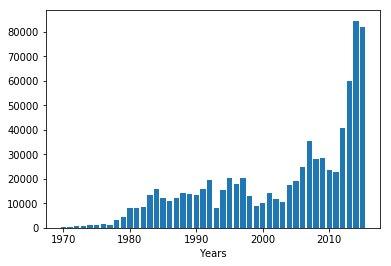

In [10]:
plt.bar(final_1['iyear'],final_1['Total_Casualities'])
plt.xlabel('Years')
plt.show()

*PS: 1 ENDS HERE*

# 2) Are certain nationalities more targeted? If yes, which one?

In [11]:
big_data.head()

,INT_ANY,INT_IDEO,INT_LOG,INT_MISC,addnotes,alternative,alternative_txt,approxdate,attacktype1,attacktype1_txt,...,weapsubtype4,weapsubtype4_txt,weaptype1,weaptype1_txt,weaptype2,weaptype2_txt,weaptype3,weaptype3_txt,weaptype4,weaptype4_txt
0,NaN,NaN,NaN,NaN,The Red Hand Commandos are a Northern Irish Lo...,NaN,.,NaN,2,Armed Assault,...,NaN,.,5,Firearms,NaN,.,NaN,.,NaN,.
1,NaN,NaN,NaN,NaN,NaN,NaN,.,NaN,2,Armed Assault,...,NaN,.,5,Firearms,NaN,.,NaN,.,NaN,.
2,NaN,NaN,NaN,NaN,The soldiers represented the first victims of ...,NaN,.,NaN,2,Armed Assault,...,NaN,.,5,Firearms,NaN,.,NaN,.,NaN,.
3,NaN,NaN,NaN,NaN,Haim Nahmani had arranged to meet a HAMAS info...,NaN,.,NaN,2,Armed Assault,...,NaN,.,9,Melee,9.0,Melee,NaN,.,NaN,.
4,NaN,NaN,NaN,NaN,NaN,NaN,.,NaN,3,Bombing/Explosion,...,NaN,.,6,Explosives/Bombs/Dynamite,NaN,.,NaN,.,NaN,.


# top 10 attacks based on nationalities 

In [12]:
f2=big_data.groupby('natlty1_txt')['eventid'].count().reset_index()
sec_final=f2.sort_values(by='eventid',ascending=False).head(10)
sec_final

,natlty1_txt,eventid
87,Iraq,18284
141,Pakistan,12326
83,India,10106
1,Afghanistan,8235
37,Colombia,7716
146,Peru,5863
147,Philippines,5377
55,El Salvador,5212
198,United States,4958
192,Turkey,3926


In [13]:
from matplotlib import pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

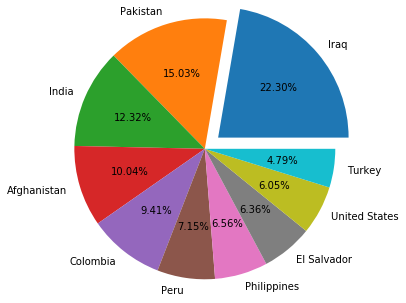

In [14]:
ex=(0.2,0,0,0,0,0,0,0,0,0)
plt.pie(sec_final['eventid'],labels=sec_final['natlty1_txt'],autopct='%.2f%%',radius=1.5,explode=ex)
plt.style.use('classic')
plt.show

*PS:2 ENDS HERE*

-------------------------------Kindly, refer the other Jupyter file for 3rd, 4th & 5th problem statements---------------------------

# 6) Heaviest hit Target types (Based on both Killed and wounded)

In [22]:
list(big_data)

['INT_ANY',
 'INT_IDEO',
 'INT_LOG',
 'INT_MISC',
 'addnotes',
 'alternative',
 'alternative_txt',
 'approxdate',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'city',
 'claim2',
 'claim3',
 'claimed',
 'claimmode',
 'claimmode2',
 'claimmode2_txt',
 'claimmode3',
 'claimmode3_txt',
 'claimmode_txt',
 'compclaim',
 'corp1',
 'corp2',
 'corp3',
 'country',
 'country_txt',
 'crit1',
 'crit2',
 'crit3',
 'dbsource',
 'divert',
 'doubtterr',
 'eventid',
 'extended',
 'gname',
 'gname2',
 'gname3',
 'gsubname',
 'gsubname2',
 'gsubname3',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'hostkidoutcome',
 'hostkidoutcome_txt',
 'iday',
 'imonth',
 'ingroup',
 'ingroup2',
 'ingroup3',
 'ishostkid',
 'iyear',
 'kidhijcountry',
 'latitude',
 'location',
 'longitude',
 'motive',
 'multiple',
 'natlty1',
 'natlty1_txt',
 'natlty2',
 'natlty2_txt',
 'natlty3',
 'natlty3_txt',
 'ndays',
 'nhostkid',
 'nhostkidus',
 'nhours',
 'nkill',


In [23]:
heaviest_hist = big_data[['targtype1_txt','nkill','nwound']].groupby(['targtype1_txt']).sum().reset_index()
heaviest_hist.head()

,targtype1_txt,nkill,nwound
0,Abortion Related,11.00,46.000
1,Airports & Aircraft,3570.49,3067.110
2,Airports & Airlines,26.80,128.125
3,Business,20267.91,48470.215
4,Educational Institution,3436.96,9252.075


In [24]:
for calusl in heaviest_hist:
    heaviest_hist['Total_Casualities'] = heaviest_hist['nkill']+heaviest_hist['nwound']
heaviest_hist=heaviest_hist.sort_values(by='Total_Casualities',ascending=False)#.reset_index()
top10_heaviest_hist=heaviest_hist.head(10)
top10_heaviest_hist

,targtype1_txt,nkill,nwound,Total_Casualities
14,Private Citizens & Property,117954.870000,136303.150,254258.020000
10,Military,87587.680000,58886.230,146473.910000
13,Police,44660.345000,55928.690,100589.035000
3,Business,20267.910000,48470.215,68738.125000
7,Government (General),23419.845000,37868.220,61288.065000
19,Transportation,13205.660000,39824.380,53030.040000
15,Religious Figures/Institutions,11750.159998,22175.840,33925.999998
17,Terrorists/Non-State Militia,7373.670000,6604.500,13978.170000
4,Educational Institution,3436.960000,9252.075,12689.035000
6,Government (Diplomatic),2548.160000,9255.780,11803.940000


([<matplotlib.patches.Wedge at 0x1be1dc814a8>,
 [Text(0.9116670857972352, 1.609771140464997, 'Private Citizens & Property'),
  Text(-1.50488490896985, 0.676625014875157, 'Military'),
  Text(-1.3589150073292469, -0.9358685820430953, 'Police'),
  Text(-0.4317934729779506, -1.5924994181140664, 'Business'),
  Text(0.4480540006450306, -1.5880011374385044, 'Government (General)'),
  Text(1.1241835160341471, -1.2077712623990948, 'Transportation'),
  Text(1.478305442548669, -0.7328799482391264, 'Religious Figures/Institutions'),
  Text(1.5939552932291214, -0.4263877615350445, 'Terrorists/Non-State Militia'),
  Text(1.6313043302823635, -0.2476816141783835, 'Educational Institution'),
  Text(1.6480194041776686, -0.0808210582328802, 'Government (Diplomatic)')],
 [Text(0.5420723212848425, 0.9571612186548629, '33.60%'),
  Text(-0.8208463139835545, 0.36906818993190377, '19.36%'),
  Text(-0.7412263676341345, -0.5104737720235064, '13.29%'),
  Text(-0.23552371253342758, -0.8686360462440361, '9.08%'),
 

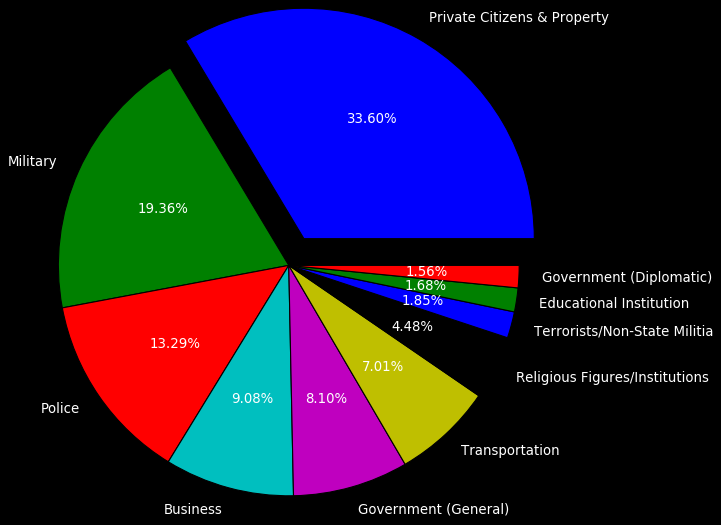

In [25]:
ex=(0.2,0,0,0,0,0,0,0,0,0)
#my_circle=plt.Circle( (0,0), 0.7, color='black')
fig = plt.figure()
fig.patch.set_facecolor('black')
plt.rcParams['text.color'] = 'white'
plt.pie(top10_heaviest_hist['Total_Casualities'],labels=top10_heaviest_hist['targtype1_txt'],autopct='%.2f%%',radius=1.5,explode=ex)

import plotly.plotly as py
import plotly.graph_objs as go

data = plt.scatter(top10_heaviest_hist['targtype1_txt'],top10_heaviest_hist['Total_Casualities'])
py.iplot(data, filename='bubblechart-size-ref')

*PS: 6 ENDS HERE*

----------------------------------------------END OF FILE--------------------------------------------